
# Lab 10

Suppose you have a list of positions of possible clients of Uber in Lisbon (Passageiros.csv). How many cars could you use and where they could be positioned in order to reduce time? Use a cluster analysis appraoch to support the solution of this problem.

* import the libraries needed
* import dataset from Passageiros.csv file
* Verify imported data
* verify data types and convert into numeric if needed. Use for example, df['x']=pd.to_numeric(df['x'], errors='coerce')
* plot a scatter chart
* create a X dataframe including only numeric columns
* calculete WCSS using X dataframe:

    wcss = []

    for i in range(1, 11):

        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

        kmeans.fit(df)

        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)

    plt.title('Elbow Method')

    plt.xlabel('Number of clusters')

    plt.ylabel('WCSS')

    plt.show()

    plot a scatter chart showing centroids of the clusters estimated



In [1]:
# Import the libraries needed
# Import dataset from Passageiros.csv file
# Verify imported data

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Passageiros.csv')
df.describe()

,X,Y
count,55.000000,55.000000
mean,-9.150791,38.742201
std,0.021092,0.017774
min,-9.205057,38.703342
25%,-9.157204,38.732938
50%,-9.149303,38.741055
75%,-9.141269,38.750661
max,-9.095090,38.791291


In [2]:
df.head() #We don't need to write df.head(5), because it give us already the first 5 lines with df.head()

,X,Y,Name
0,-9.163874,38.711563,Passageiro 1
1,-9.199447,38.703342,Passageiro 2
2,-9.143752,38.729060,Passageiro 3
3,-9.150410,38.755656,Passageiro 4
4,-9.136334,38.758534,Passageiro 5


In [2]:
df.shape

(55, 3)

In [3]:
# Verify data types and convert into numeric if needed. Use for example, df['x']=pd.to_numeric(df['x'], errors='coerce')
df.dtypes

X       float64
Y       float64
Name     object
dtype: object

In [5]:
df["X"]=pd.to_numeric(df["X"], errors="coerce") #as we can see X and Y are numerical already
df["Y"]=pd.to_numeric(df["Y"], errors="coerce")
df['Name']=pd.to_numeric(df['Name'], errors = 'coerce') #however Name is not
df.dtypes

X       float64
Y       float64
Name     object
dtype: object

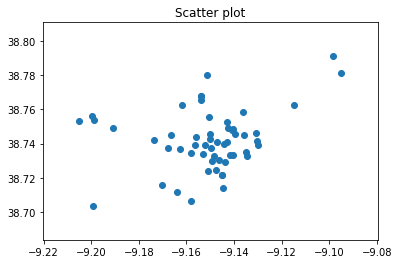

In [6]:
# Plot a scatter chart
# NÃO SE USA ÍNDICE PORQUE É UM DATAFRAME E NÃO UM ARRAY

plt.scatter(df["X"], df["Y"])
plt.title("Scatter plot")
plt.show()

In [7]:
# Create a X dataframe including only numeric columns
numerics = ["float", "int"]
X = df.select_dtypes(include=numerics)

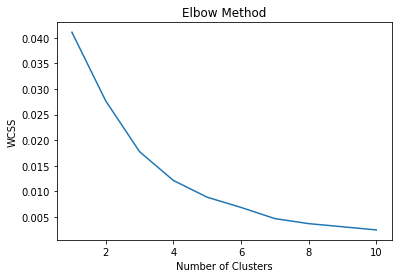

In [8]:
# Calculate WCSS using X dataframe
#plot a scatter chart showing centroids of the clusters estimated

wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()